In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 100)

In [2]:
#loading data
def load_data():
    df_raw = pd.read_csv('data/Thermosyphone_mode_60_degree.csv', delimiter=';')
    df_raw.drop(df_raw.index[0], inplace=True)
    return df_raw

def drop_cols(df:pd.DataFrame):
    df.drop(columns=['mode', 'effi_thermosy', 'effi_forced', 'C', 'f', 'ha', 'v', 'Kb', 'Xb', 'Ae', 'Ac',
       'beta [degree]', 'N', 'Tau', 'alpha','Ub [W/m2 K]', 'Ue [W/m2 K]', 'Fr', 'effi_thermosy',
       'effi_forced','Ta [K] ', 'Tin [K]', 'Tout [K]', 'Tplate [K]'], inplace=True)
    return df

def datetime_col(df:pd.DataFrame):
    df['TIME'] = pd.to_datetime(df['time'])
    # df = df.set_index(df['TIME'])
    df.drop(columns=['time'], inplace=True)
    return df

def liter_col(df:pd.DataFrame):
    time_interval = 10 * 60 # seconds
    df['l/sec'] = df['m_dot [kg/sec]']
    df['l_out'] = df['l/sec'] * (time_interval)
    df['l_out_cumsum'] = df['l_out'].cumsum()
    return df


def pred_col_Tout(df:pd.DataFrame):
    # T_out = df.pop('Tout [C]')
    # l_out = df.pop('l_out_cumsum')
    df.drop(columns=['l_out', 'l/sec', 'l_out_cumsum'], inplace=True)
    return df

# def feature_prep_temp(df:pd.DataFrame):
#     df['y'] = df['Tout [C]']
#     df['ds'] = df['TIME']
#     df['unique_id'] = df['mode']
#     df.drop(columns=['Tout [C]', 'TIME', 'mode'], inplace=True)
#     x_df = df[['I [W/m2]', 'm_dot [kg/sec]', 'Cp', 'Ta [C]', 'Tin [C]', 'Tplate [C] ', 'Ttank  [C] ', 'Pin [Kpa]', 'Pout  [Kpa]']]
#     df = df[['ds', 'y', 'unique_id']]
#     return df, x_df

def xy_split(df:pd.DataFrame):
    y_true = df.pop('Tout [C]')
    # df.drop(columns='TIME', inplace=True)
    return df, y_true

def train_test_splitter(x:pd.DataFrame, y:pd.DataFrame):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)
    return x_train, x_test, y_train, y_test

def data_pipeline():
    df_raw = load_data()
    df = drop_cols(df_raw)
    df = datetime_col(df)
    df = liter_col(df)  # with all features
    return df

def data_pipeline_temp():
    df = data_pipeline()
    df_t = pred_col_Tout(df)
    x, y = xy_split(df_t)
    x_train, x_test, y_train, y_test = train_test_splitter(x, y)
    return x_train, x_test, y_train, y_test, df



In [3]:
df_raw = load_data()
df = drop_cols(df_raw)
df = datetime_col(df)
df = liter_col(df)
df_f = df.copy()
df_ml_T = pred_col_Tout(df_f)
x, y = xy_split(df_ml_T)

/var/folders/qf/2jw75py95_q8c1t5jmt77sx80000gn/T/ipykernel_37760/455208175.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TIME'] = pd.to_datetime(df['time'])


In [4]:
display(df)

,I [W/m2],m_dot [kg/sec],Cp,Ta [C],Tin [C],Tout [C],Tplate [C],Ttank [C],Pin [Kpa],Pout [Kpa],TIME,l/sec,l_out,l_out_cumsum
1,450,0.000000,4180,35.26,37.6,63.3,77.9,37.50,108.1,103.3,2024-05-02 11:00:00,0.000000,0.0000,0.0000
2,450,0.000000,4180,35.20,37.6,64.3,78.1,37.70,108.2,103.3,2024-05-02 11:10:00,0.000000,0.0000,0.0000
3,450,0.000000,4180,35.40,37.7,63.7,77.8,37.70,108.1,103.1,2024-05-02 11:20:00,0.000000,0.0000,0.0000
4,450,0.000000,4180,35.40,37.7,63.7,77.6,37.80,108.1,103.3,2024-05-02 11:30:00,0.000000,0.0000,0.0000
5,450,0.000000,4180,36.10,37.8,63.5,78.2,38.20,108.1,103.3,2024-05-02 11:40:00,0.000000,0.0000,0.0000
6,450,0.000000,4180,35.90,37.8,63.5,77.2,39.10,108.2,103.3,2024-05-02 11:50:00,0.000000,0.0000,0.0000
7,450,0.000000,4180,36.90,37.9,63.3,77.6,40.10,108.1,103.4,2024-05-02 12:00:00,0.000000,0.0000,0.0000
8,450,0.000000,4180,36.20,38.0,64.0,77.5,40.90,108.3,103.3,2024-05-02 12:10:00,0.000000,0.0000,0.0000
9,450,0.000000,4180,36.40,38.2,63.8,78.2,43.20,108.1,103.2,2024-05-02 12:20:00,0.000000,0.0000,0.0000
10,450,0.000000,4180,36.50,38.5,66.7,79.5,44.10,108.1,103.3,2024-05-02 12:30:00,0.000000,0.0000,0.0000


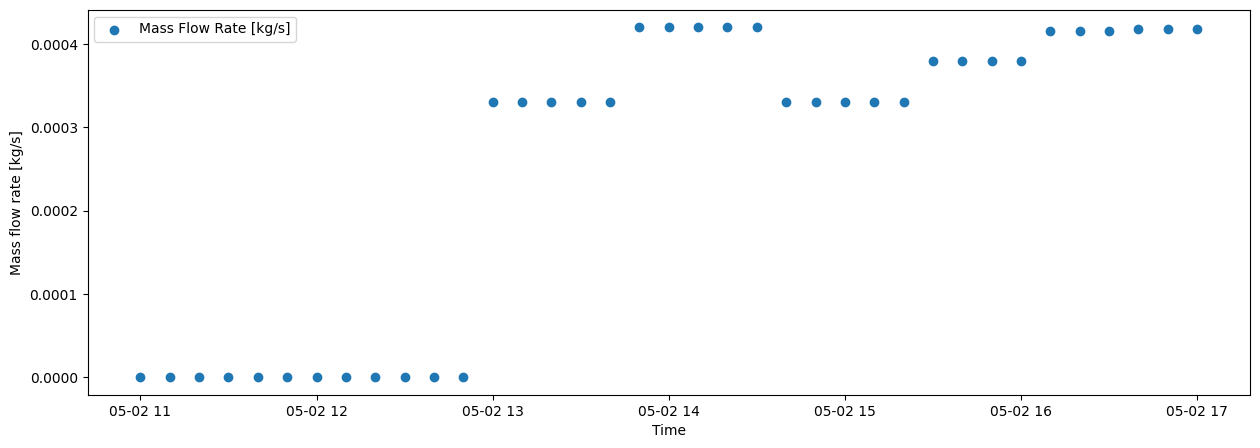

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.scatter(x=df['TIME'], y=df['m_dot [kg/sec]'], label ='Mass Flow Rate [kg/s]')
plt.xlabel('Time')
plt.ylabel('Mass flow rate [kg/s]')
plt.legend()
plt.show()

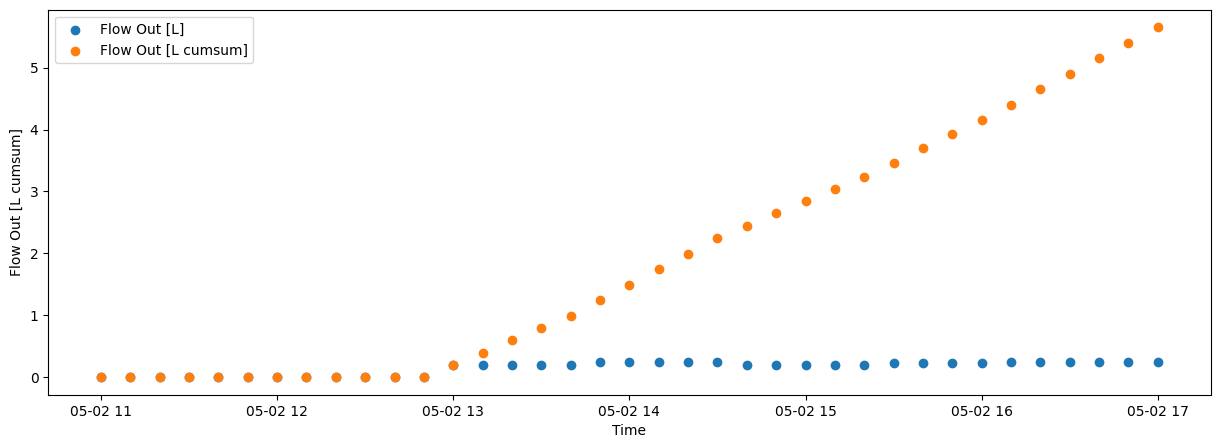

In [6]:
plt.figure(figsize=(15,5))
plt.scatter(x=df['TIME'], y=df['l_out'], label ='Flow Out [L]')
plt.scatter(x=df['TIME'], y=df['l_out_cumsum'], label ='Flow Out [L cumsum]')
plt.xlabel('Time')
plt.ylabel('Flow Out [L cumsum]')
plt.legend()
plt.show()

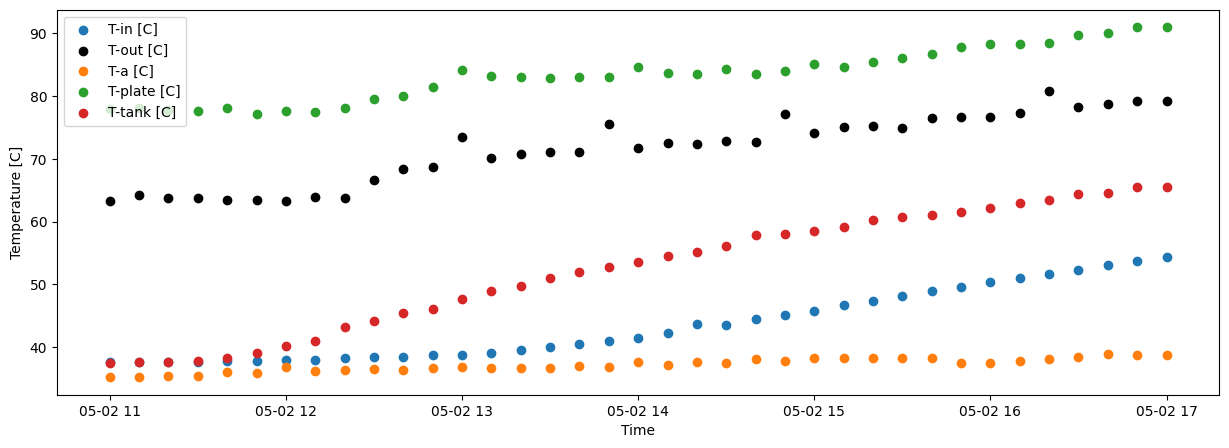

In [7]:
plt.figure(figsize=(15,5))
plt.scatter(x=df['TIME'], y=df['Tin [C]'], label ='T-in [C]')
plt.scatter(x=df['TIME'], y=df['Tout [C]'], label ='T-out [C]', c='k')
plt.scatter(x=df['TIME'], y=df['Ta [C]'], label ='T-a [C]')
plt.scatter(x=df['TIME'], y=df['Tplate [C] '], label ='T-plate [C]')
plt.scatter(x=df['TIME'], y=df['Ttank  [C] '], label ='T-tank [C]')
plt.xlabel('Time')
plt.ylabel('Temperature [C]')
plt.legend()
plt.show()

In [8]:
# checking corelation of T-out with other params
T_out = df['Tout [C]']
df_corr_t = df.corrwith(T_out)
print(df_corr_t.sort_values(ascending=False))

Tout [C]          1.000000
Ttank  [C]        0.967327
Tplate [C]        0.962006
TIME              0.956650
l_out_cumsum      0.898285
l_out             0.897558
m_dot [kg/sec]    0.897558
l/sec             0.897558
Tin [C]           0.893782
Pin [Kpa]         0.883789
Ta [C]            0.881253
Pout  [Kpa]       0.175238
I [W/m2]               NaN
Cp                     NaN
dtype: float64


/Users/nirmal/Documents/np_dsci_codes/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nirmal/Documents/np_dsci_codes/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [9]:
# checking corelation of Water-out with other params
water_out = df['l_out_cumsum']
df_corr_w = df.corrwith(water_out)
print(df_corr_w.sort_values(ascending=False))

l_out_cumsum      1.000000
Tin [C]           0.997576
TIME              0.965629
Ttank  [C]        0.938873
Tplate [C]        0.935425
Tout [C]          0.898285
Ta [C]            0.881395
m_dot [kg/sec]    0.759762
l/sec             0.759762
l_out             0.759762
Pin [Kpa]         0.729440
Pout  [Kpa]      -0.065378
I [W/m2]               NaN
Cp                     NaN
dtype: float64


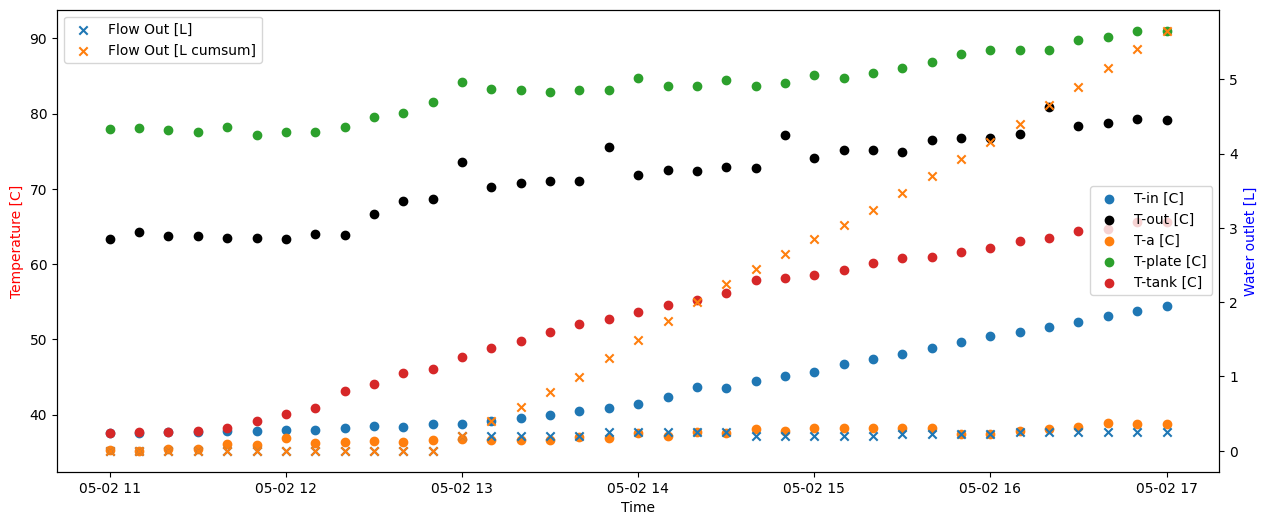

In [10]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15,6))  # Creating the figure and the first axis (left y-axis)

# Scatter plot on the left y-axis
ax1.scatter(x=df['TIME'], y=df['Tin [C]'], label ='T-in [C]')
ax1.scatter(x=df['TIME'], y=df['Tout [C]'], label ='T-out [C]', c='k')
ax1.scatter(x=df['TIME'], y=df['Ta [C]'], label ='T-a [C]')
ax1.scatter(x=df['TIME'], y=df['Tplate [C] '], label ='T-plate [C]')
ax1.scatter(x=df['TIME'], y=df['Ttank  [C] '], label ='T-tank [C]')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature [C]', color='red')
ax1.legend(loc='right')

# Creating the second axis (right y-axis)
ax2 = ax1.twinx()

# Scatter plot on the right y-axis
ax2.scatter(x=df['TIME'], y=df['l_out'],marker= 'x', label ='Flow Out [L]')
ax2.scatter(x=df['TIME'], y=df['l_out_cumsum'],marker='x', label ='Flow Out [L cumsum]')
ax2.set_ylabel('Water outlet [L]', color='blue')
# ax2.legend(loc='upper right')

plt.legend()
plt.show()


ML model - 1 training

In [11]:
x_train_, x_test_, y_train, y_test, df_ml = data_pipeline_temp()

/var/folders/qf/2jw75py95_q8c1t5jmt77sx80000gn/T/ipykernel_37760/455208175.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TIME'] = pd.to_datetime(df['time'])


In [12]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn.base import RegressorMixin
from sklearn.metrics import mean_squared_error
import numpy as np

In [13]:
display(x_train_.head())

,I [W/m2],m_dot [kg/sec],Cp,Ta [C],Tin [C],Tplate [C],Ttank [C],Pin [Kpa],Pout [Kpa],TIME
9,450,0.000000,4180,36.4,38.2,78.2,43.2,108.1,103.2,2024-05-02 12:20:00
16,450,0.000330,4180,36.6,40.0,82.9,51.0,108.4,103.4,2024-05-02 13:30:00
13,450,0.000330,4180,36.8,38.8,84.2,47.7,108.5,103.4,2024-05-02 13:00:00
33,450,0.000416,4180,38.1,51.7,88.5,63.5,108.5,103.3,2024-05-02 16:20:00
10,450,0.000000,4180,36.5,38.5,79.5,44.1,108.1,103.3,2024-05-02 12:30:00


In [14]:
x_train = x_train_.drop(columns='TIME')
x_test = x_test_.drop(columns='TIME')

In [15]:
model_rfr = RandomForestRegressor() # bagging - to reduce variance
model_abr = AdaBoostRegressor() # boosting - to reduce ba

In [16]:
def model_trianing(x_train:pd.DataFrame, y_train:pd.Series, model):
    model.fit(x_train, y_train)
    return model

def temp_prediction(x_test:pd.DataFrame, model):
    y_pred = model.predict(x_test)
    return y_pred

def model_evaluation(y_test:pd.Series, y_pred:pd.Series):
    accuracy = mean_squared_error(y_pred=y_pred, y_true=y_test)
    accuracy = np.sqrt(accuracy)
    print(f'accuracy of the model RMSE: {accuracy}')
    return accuracy


In [17]:
# predicting temperature out RFR
model_rfr_trained = model_trianing(x_train=x_train, y_train=y_train, model=model_rfr)
y_pred_rfr = temp_prediction(x_test=x_test, model=model_rfr_trained)
accuracy_rfr = model_evaluation(y_pred=y_pred_rfr, y_test=y_test)


accuracy of the model RMSE: 1.371569575340581


In [18]:
# predicting temperature out ABR
model_abr_trained = model_trianing(x_train=x_train, y_train=y_train, model=model_abr)
y_pred_abr = temp_prediction(x_test=x_test, model=model_abr_trained)
accuracy_abr = model_evaluation(y_pred=y_pred_abr, y_test=y_test)

accuracy of the model RMSE: 1.2933460600449893


/var/folders/qf/2jw75py95_q8c1t5jmt77sx80000gn/T/ipykernel_37760/455208175.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TIME'] = pd.to_datetime(df['time'])


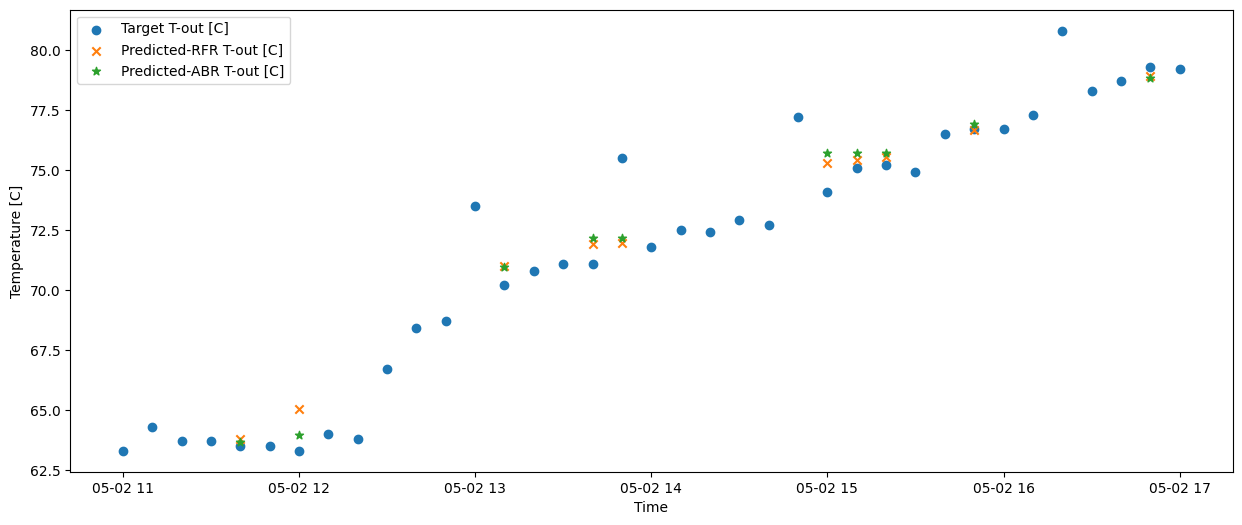

In [19]:
plt.figure(figsize=(15,6))

data = data_pipeline()
plt.scatter(data['TIME'], data['Tout [C]'], label='Target T-out [C]')
plt.scatter(x_test_['TIME'], y_pred_rfr,marker='x', label='Predicted-RFR T-out [C]')
plt.scatter(x_test_['TIME'], y_pred_abr,marker='*', label='Predicted-ABR T-out [C]')

plt.xlabel('Time')
plt.ylabel('Temperature [C]')
plt.legend()
plt.show()

ML model 2 training (selecting adaboostregressor)

In [20]:
x_ = x.drop(columns='TIME')
display(x_.head())

,I [W/m2],m_dot [kg/sec],Cp,Ta [C],Tin [C],Tplate [C],Ttank [C],Pin [Kpa],Pout [Kpa]
1,450,0.0,4180,35.26,37.6,77.9,37.5,108.1,103.3
2,450,0.0,4180,35.20,37.6,78.1,37.7,108.2,103.3
3,450,0.0,4180,35.40,37.7,77.8,37.7,108.1,103.1
4,450,0.0,4180,35.40,37.7,77.6,37.8,108.1,103.3
5,450,0.0,4180,36.10,37.8,78.2,38.2,108.1,103.3


In [21]:
y_pred_abr_ = temp_prediction(x_, model=model_abr)

/var/folders/qf/2jw75py95_q8c1t5jmt77sx80000gn/T/ipykernel_37760/455208175.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TIME'] = pd.to_datetime(df['time'])


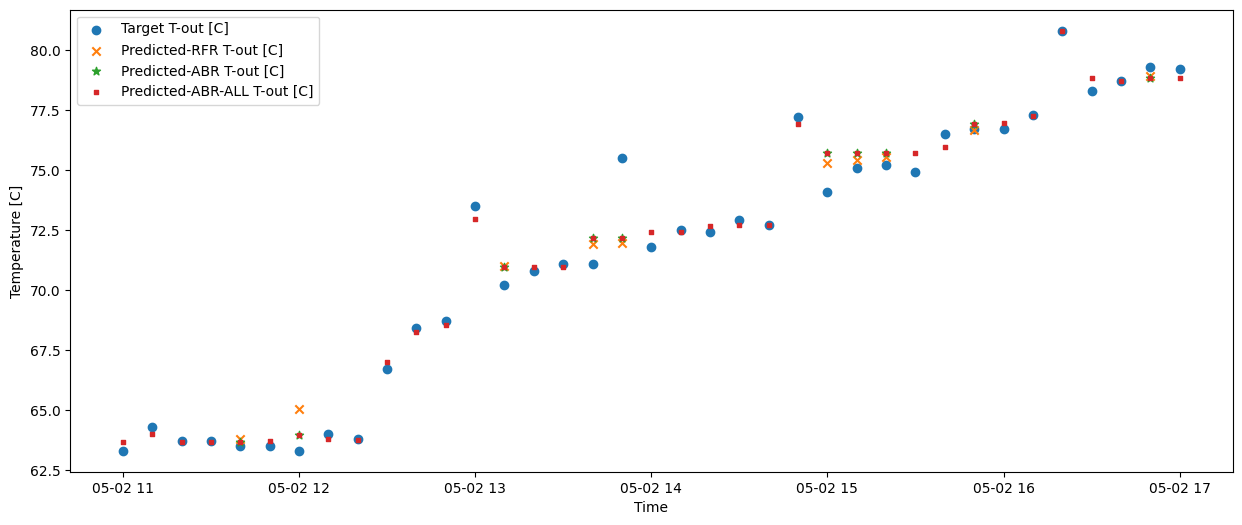

In [22]:
plt.figure(figsize=(15,6))

data = data_pipeline()
plt.scatter(data['TIME'], data['Tout [C]'], label='Target T-out [C]')
plt.scatter(x_test_['TIME'], y_pred_rfr,marker='x', label='Predicted-RFR T-out [C]')
plt.scatter(x_test_['TIME'], y_pred_abr,marker='*', label='Predicted-ABR T-out [C]')
plt.scatter(x['TIME'], y_pred_abr_, marker='s',s= 12, label='Predicted-ABR-ALL T-out [C]')

plt.xlabel('Time')
plt.ylabel('Temperature [C]')
plt.legend()
plt.show()

In [23]:
# new features including prediction
df.drop(columns=['Tout [C]','l/sec', 'l_out'], inplace=True)
x_temp_pred = pd.concat([df, pd.DataFrame(y_pred_abr_)], axis=1)
display(x_temp_pred.head())

,I [W/m2],m_dot [kg/sec],Cp,Ta [C],Tin [C],Tplate [C],Ttank [C],Pin [Kpa],Pout [Kpa],TIME,l_out_cumsum,0
1,450.0,0.0,4180.0,35.26,37.6,77.9,37.5,108.1,103.3,2024-05-02 11:00:00,0.0,64.000000
2,450.0,0.0,4180.0,35.20,37.6,78.1,37.7,108.2,103.3,2024-05-02 11:10:00,0.0,63.671429
3,450.0,0.0,4180.0,35.40,37.7,77.8,37.7,108.1,103.1,2024-05-02 11:20:00,0.0,63.650000
4,450.0,0.0,4180.0,35.40,37.7,77.6,37.8,108.1,103.3,2024-05-02 11:30:00,0.0,63.650000
5,450.0,0.0,4180.0,36.10,37.8,78.2,38.2,108.1,103.3,2024-05-02 11:40:00,0.0,63.711111


In [24]:
cols = ['I [W/m2]', 'm_dot [kg/sec]','Cp','Ta [C]','Tin [C]','Tplate [C] ', 'Ttank  [C] ', 'Pin [Kpa]','Pout  [Kpa]','TIME',  'l_out_cumsum','Tout_pred']

x_temp_pred.columns = cols
x_temp_pred.head()

,I [W/m2],m_dot [kg/sec],Cp,Ta [C],Tin [C],Tplate [C],Ttank [C],Pin [Kpa],Pout [Kpa],TIME,l_out_cumsum,Tout_pred
1,450.0,0.0,4180.0,35.26,37.6,77.9,37.5,108.1,103.3,2024-05-02 11:00:00,0.0,64.000000
2,450.0,0.0,4180.0,35.20,37.6,78.1,37.7,108.2,103.3,2024-05-02 11:10:00,0.0,63.671429
3,450.0,0.0,4180.0,35.40,37.7,77.8,37.7,108.1,103.1,2024-05-02 11:20:00,0.0,63.650000
4,450.0,0.0,4180.0,35.40,37.7,77.6,37.8,108.1,103.3,2024-05-02 11:30:00,0.0,63.650000
5,450.0,0.0,4180.0,36.10,37.8,78.2,38.2,108.1,103.3,2024-05-02 11:40:00,0.0,63.711111


In [25]:
x_temp_pred_features = x_temp_pred.drop(columns='TIME')

x_temp_pred_features.dropna(axis=0, inplace=True)

In [26]:
y_water = x_temp_pred_features.pop('l_out_cumsum')

In [27]:
x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(x_temp_pred_features, y_water, test_size=0.25, random_state=42)

In [28]:
# predicting water out - ABR
model_abr_trained_water_out = model_trianing(x_train=x_train_w, y_train=y_train_w, model=model_abr)
y_pred_abr_water_out = temp_prediction(x_test=x_test_w, model=model_abr_trained_water_out)
accuracy_abr_water_out = model_evaluation(y_pred=y_pred_abr_water_out, y_test=y_test_w)


accuracy of the model RMSE: 0.2971889428928637


In [29]:
# predicting water out - RFR
model_rfr_trained_water_out = model_trianing(x_train=x_train_w, y_train=y_train_w, model=model_rfr)
y_pred_rfr_water_out = temp_prediction(x_test=x_test_w, model=model_rfr_trained_water_out)
accuracy_rfr_water_out = model_evaluation(y_pred=y_pred_rfr_water_out, y_test=y_test_w)

accuracy of the model RMSE: 0.25026785123143663


In [30]:
x_temp_pred.dropna(axis=0, inplace=True)
x_train_w_, x_test_w_, y_train_w_, y_test_w_ = train_test_split(x_temp_pred, y_water, test_size=0.25, random_state=42)

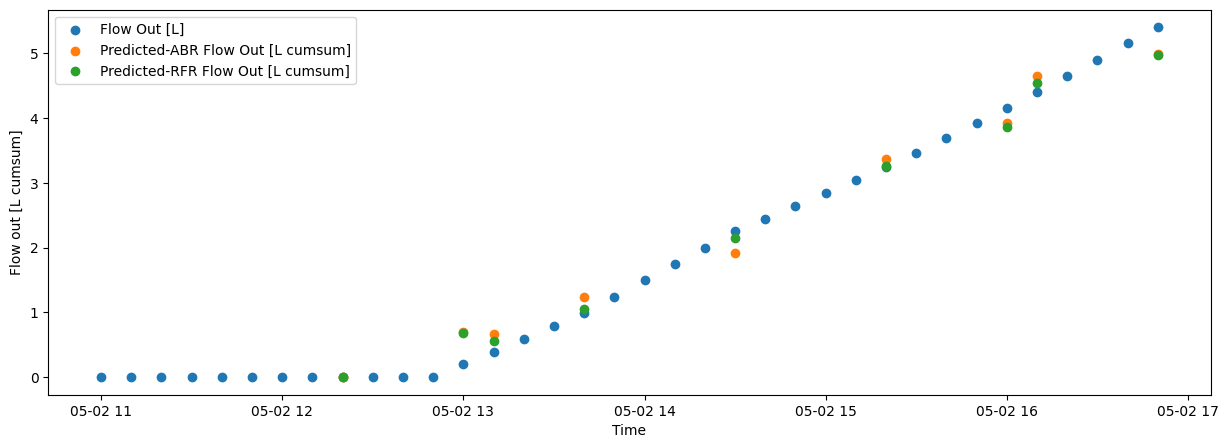

In [31]:
plt.figure(figsize=(15,5))
plt.scatter(x=x_temp_pred['TIME'], y=x_temp_pred['l_out_cumsum'], label ='Flow Out [L]')
plt.scatter(x=x_test_w_['TIME'], y=y_pred_abr_water_out, label ='Predicted-ABR Flow Out [L cumsum]')
plt.scatter(x=x_test_w_['TIME'], y=y_pred_rfr_water_out, label ='Predicted-RFR Flow Out [L cumsum]')
plt.xlabel('Time')
plt.ylabel('Flow out [L cumsum]')
plt.legend()
plt.show()